In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv("Student_PassFail_DTC.csv")
df

,Study_Hours,Sleep_Hours,Attendance_%,Previous_Score,Pass
0,6.96,6.71,78.3,75.6,0
1,2.86,4.33,71.2,76.0,0
2,2.27,7.27,97.3,92.4,0
3,5.51,8.98,72.6,87.0,0
4,7.19,7.85,96.4,60.4,0
...,...,...,...,...,...
195,6.36,5.80,77.8,36.5,0
196,0.32,5.05,86.5,65.4,0
197,7.45,6.11,82.0,52.6,0
198,4.73,5.09,61.1,55.4,0


In [18]:
df['Pass'].unique()

array([0])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Study_Hours     200 non-null    float64
 1   Sleep_Hours     200 non-null    float64
 2   Attendance_%    200 non-null    float64
 3   Previous_Score  200 non-null    float64
 4   Pass            200 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Study_Hours,Sleep_Hours,Attendance_%,Previous_Score,Pass
count,200.000000,200.000000,200.000000,200.000000,200.0
mean,5.032600,6.451700,79.892500,64.520000,0.0
std,2.664045,1.476584,11.629139,19.048505,0.0
min,0.030000,4.020000,60.000000,30.100000,0.0
25%,3.047500,5.187500,70.800000,47.200000,0.0
50%,5.210000,6.320000,79.550000,65.000000,0.0
75%,7.182500,7.790000,89.425000,80.825000,0.0
max,9.950000,8.980000,100.000000,94.700000,0.0


In [6]:
df.columns

Index(['Study_Hours', 'Sleep_Hours', 'Attendance_%', 'Previous_Score', 'Pass'], dtype='object')

In [7]:
x=df[['Study_Hours', 'Sleep_Hours', 'Attendance_%', 'Previous_Score']].values
y=df['Pass'].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=4,        # control complexity (you can tune this)
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)



In [10]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [11]:
y_pred = clf.predict(x_test)

In [12]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



c:\Users\husna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


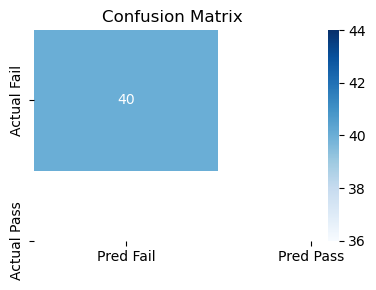

In [14]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Fail", "Pred Pass"],
            yticklabels=["Actual Fail", "Actual Pass"])
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [16]:
new_student = np.array([[8.0, 7.5, 99.0, 75.0]])

pred_class = clf.predict(new_student)[0]
pred_label = "Pass" if pred_class == 1 else "Fail"

print(f"\nPrediction for new student: {pred_label} (class = {pred_class})")


Prediction for new student: Fail (class = 0)
